In [6]:
%pip install gymnasium minigrid matplotlib


In [10]:
import gymnasium as gym
import minigrid
from minigrid.wrappers import ImgObsWrapper
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Create the environment. Use a standard environment like "MiniGrid-Empty-8x8-v0"
# By default, minigrid environments are partially observable.
env = gym.make("MiniGrid-Empty-8x8-v0", render_mode="rgb_array")

# Wrap the environment with ImgObsWrapper to get the full grid as an image observation
# This observation will be an RGB array of the full grid.
env = ImgObsWrapper(env)

# Check the new observation space shape (it will be the full grid dimensions * 3 for RGB channels)
print("New observation space shape:", env.observation_space.shape)


New observation space shape: (7, 7, 3)


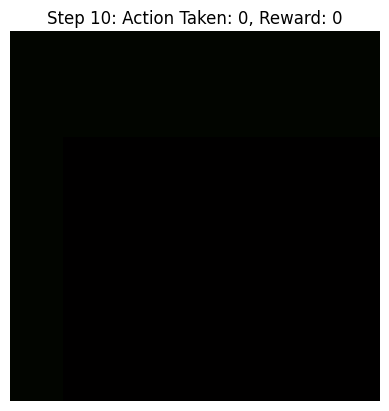

In [11]:
# Reset the environment
obs, info = env.reset(seed=42)

# Display the initial observation
plt.imshow(obs)
plt.title("Initial Fully Observable Environment State")
plt.axis('off')
plt.show()

# Run the environment for a few steps with a random policy and visualize
for _ in range(10):
    # Sample a random action
    action = env.action_space.sample()

    # Take a step in the environment
    obs, reward, terminated, truncated, info = env.step(action)

    # Clear previous output and display the new state to simulate a video feed
    clear_output(wait=True)
    plt.imshow(obs)
    plt.title(f"Step {_ + 1}: Action Taken: {action}, Reward: {reward}")
    plt.axis('off')
    plt.show()

    # Add a short pause for visualization
    time.sleep(0.1)

    if terminated or truncated:
        print("Episode finished.")
        break

env.close()
